In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from collections import Counter

In [10]:
%matplotlib inline

# AdaBoost

# Load the moon dataset

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

In [7]:
counter_y = Counter(y)

In [8]:
counter_y

Counter({0: 250, 1: 250})

In [14]:
from matplotlib.colors import ListedColormap

In [39]:
def plot_decision_boundary(clf, X, y, ax, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True, isfit = False):
    if isfit ==False:
        clf.fit(X,y)
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)

    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        ax.contour(x1, x2, y_pred, cmap = custom_cmap2, alpha=0.8)
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    ax.set_xlim(axes[0], axes[1])
    ax.set_ylim(axes[2], axes[3])
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)

# Take Support Vector Machine Classifier as base predictor of AdaBoost 

In [11]:
from sklearn.svm import SVC

In [42]:
import time

In [12]:
svc_clf = SVC(kernel="rbf", C=0.05, random_state=42)

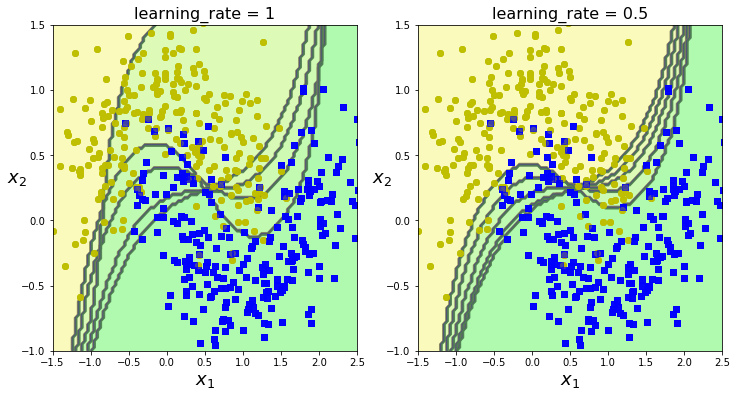

In [43]:
m = len(X)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
for subplot, learning_rate in ((ax1, 1), (ax2, 0.5)):
    instance_weight = np.ones(m)    
    for i in range(0,5):
        svc_clf.fit(X,y,sample_weight=instance_weight)
        plot_decision_boundary(svc_clf,X,y,subplot, isfit=True)
        y_pred = svc_clf.predict(X)
        instance_weight[y!=y_pred] *= (1+learning_rate)
    subplot.set_title("learning_rate = {}".format(learning_rate), fontsize=16)    

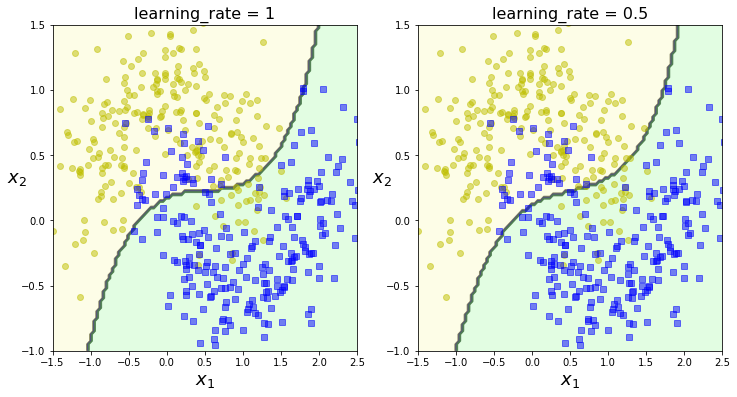

In [44]:
m = len(X)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
for subplot, learning_rate in ((ax1, 1), (ax2, 0.5)):
    instance_weight = np.ones(m)    
    for i in range(0,5):
        svc_clf.fit(X,y,sample_weight=instance_weight)
        if i ==1:
            plot_decision_boundary(svc_clf,X,y,subplot, isfit=True)
        y_pred = svc_clf.predict(X)
        instance_weight[y!=y_pred] *= (1+learning_rate)
    subplot.set_title("learning_rate = {}".format(learning_rate), fontsize=16)    

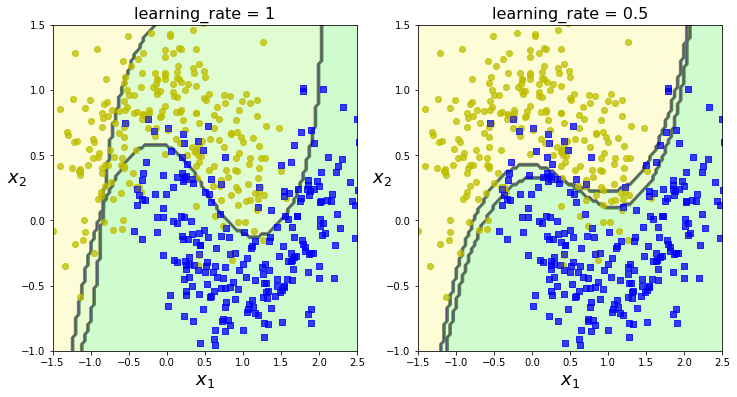

In [50]:
m = len(X)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
for subplot, learning_rate in ((ax1, 1), (ax2, 0.5)):
    instance_weight = np.ones(m)    
    for i in range(0,5):
        svc_clf.fit(X,y,sample_weight=instance_weight)
        if i in (3,4):
            plot_decision_boundary(svc_clf,X,y,subplot, isfit=True)
        y_pred = svc_clf.predict(X)
        instance_weight[y!=y_pred] *= (1+learning_rate)
    subplot.set_title("learning_rate = {}".format(learning_rate), fontsize=16) 

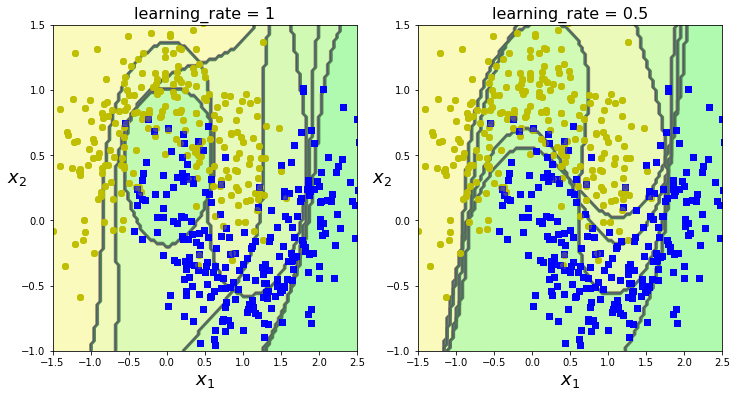

In [48]:
m = len(X)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
for subplot, learning_rate in ((ax1, 1), (ax2, 0.5)):
    instance_weight = np.ones(m)    
    for i in range(0,10):
        svc_clf.fit(X,y,sample_weight=instance_weight)
        if i in range(5,10):
            plot_decision_boundary(svc_clf,X,y,subplot, isfit=True)
        y_pred = svc_clf.predict(X)
        instance_weight[y!=y_pred] *= (1+learning_rate)
    subplot.set_title("learning_rate = {}".format(learning_rate), fontsize=16) 

# Gradient Boosting

# Generate data

In [51]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

# Take the Decesion Tree Regressor as the base predictor

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

y_pred_1 = tree_reg1.predict(X)

In [62]:
y2 = y- y_pred_1

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

y_pred_2 = tree_reg2.predict(X)

In [76]:
y3 = y2 - y_pred_2 

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

y_pred_3 = tree_reg3.predict(X)

In [68]:
def plot_predictions(regressors, X, y, axes, ax, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    ax.plot(X[:, 0], y, data_style, label=data_label)
    ax.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        ax.legend(loc="upper center", fontsize=16)
    ax.axis(axes)
    ax.set_ylabel("$y$", fontsize=16, rotation=0)
    ax.set_title("Residuals and tree predictions", fontsize=16)

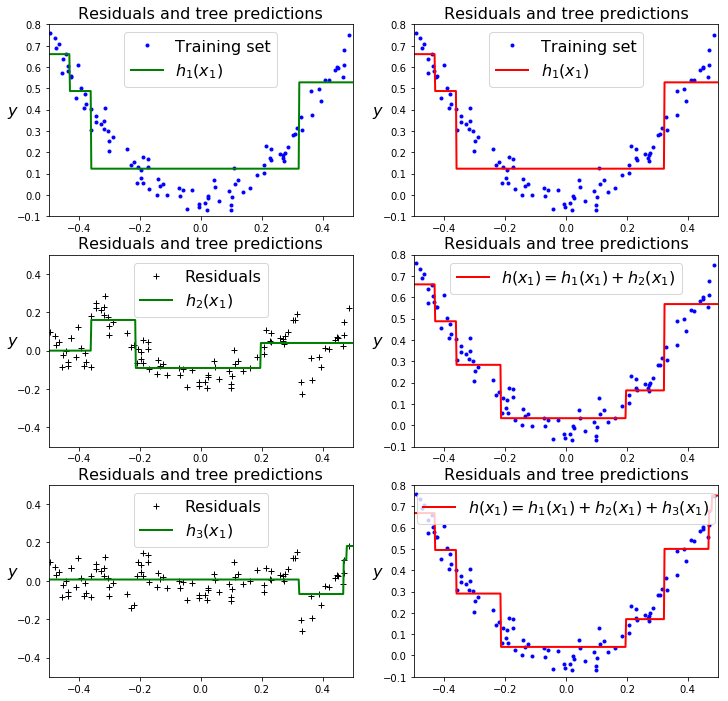

In [91]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (12, 12))

plot_predictions([tree_reg1], X, y, [-0.5, 0.5, -0.1, 0.8], ax1,
                 label="$h_1(x_1)$", style="g-", data_label="Training set")

plot_predictions([tree_reg2], X, y2, [-0.5, 0.5, -0.5, 0.5], ax3,
                 label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")

plot_predictions([tree_reg3], X, y3, [-0.5, 0.5, -0.5, 0.5], ax5,
                 label="$h_3(x_1)$", style="g-", data_style="k+", data_label="Residuals")

plot_predictions([tree_reg1], X, y, [-0.5, 0.5, -0.1, 0.8], ax2,
                 label="$h_1(x_1)$", style="r-", data_label="Training set")

plot_predictions([tree_reg1, tree_reg2], X, y, [-0.5, 0.5, -0.1, 0.8], ax4,
                 label="$h(x_1) = h_1(x_1) + h_2(x_1)$", style="r-")

plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, [-0.5, 0.5, -0.1, 0.8], ax6,
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$" , style="r-")